In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import nbformat
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
raw_df = pd.read_csv('weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
raw_df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [4]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

<Axes: title={'center': 'Number of rows per year'}, xlabel='Date', ylabel='count'>

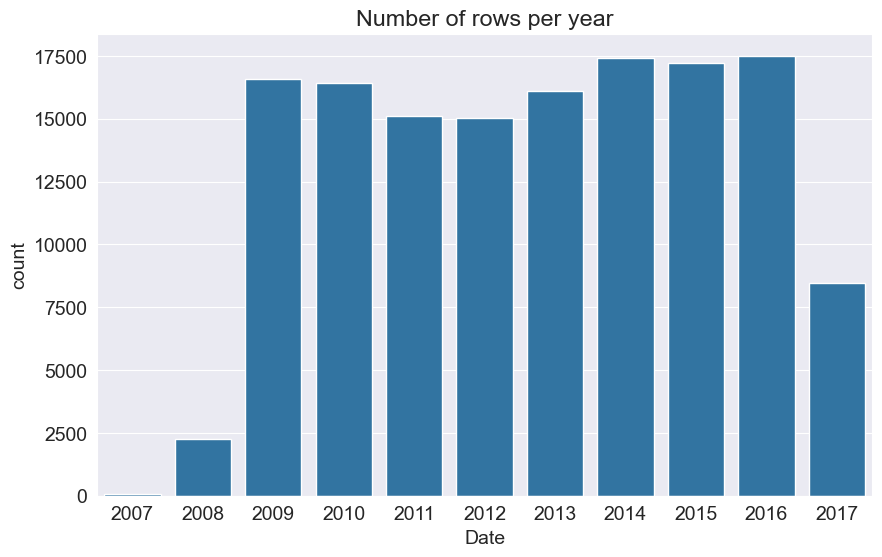

In [5]:
plt.title('Number of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

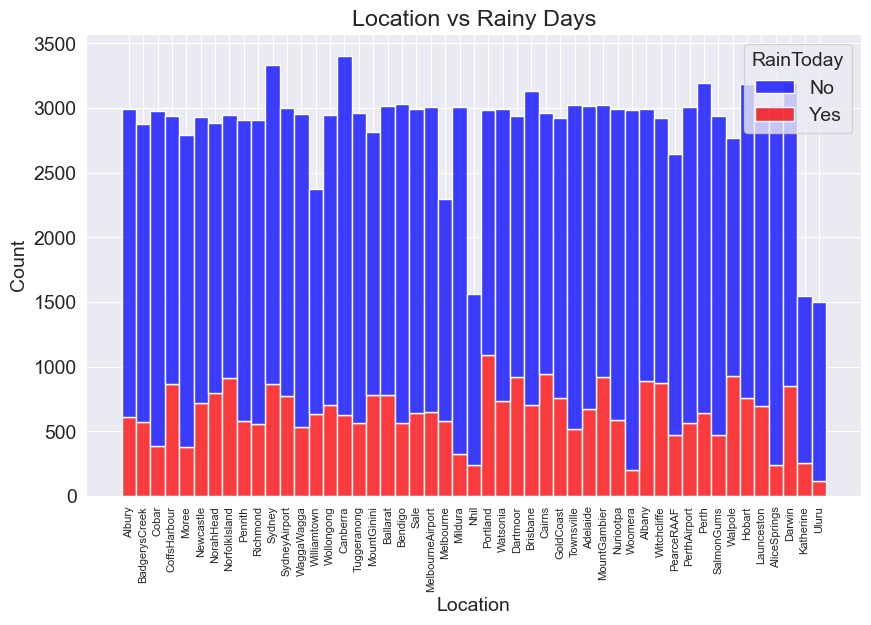

In [6]:
fig, ax = plt.subplots()
sns.histplot(data = raw_df,
             x = 'Location',
             hue = 'RainToday',
             palette = ['blue','red'],
             multiple = 'stack',
             ax = ax)
ax.set_title('Location vs Rainy Days')
plt.xticks(rotation = 90,
           fontsize = 8)
plt.show()

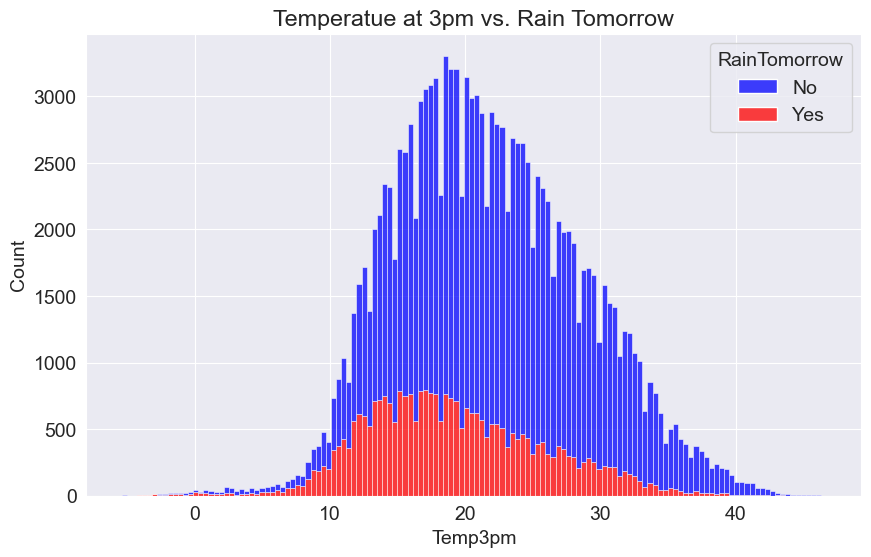

In [7]:
fig, ax = plt.subplots()
sns.histplot(data = raw_df,
             x = 'Temp3pm',
             hue = 'RainTomorrow',
             multiple = 'stack',
             palette = ['blue','red'],
             ax = ax)
ax.set_title('Temperatue at 3pm vs. Rain Tomorrow')
plt.show()

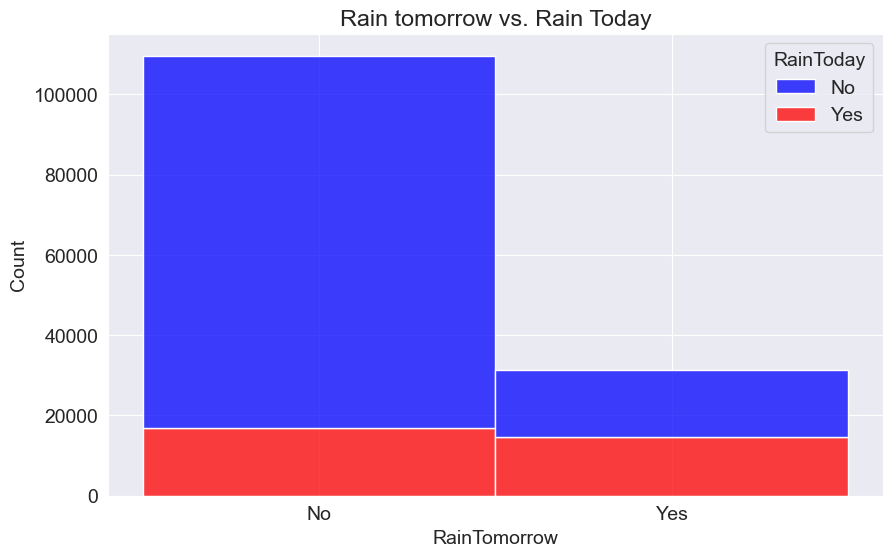

In [8]:
fig, ax = plt.subplots()
sns.histplot(data = raw_df,
             x = 'RainTomorrow',
             hue = 'RainToday',
             multiple = 'stack',
             palette = ['blue','red'],
             ax = ax)
ax.set_title('Rain tomorrow vs. Rain Today')
plt.show()

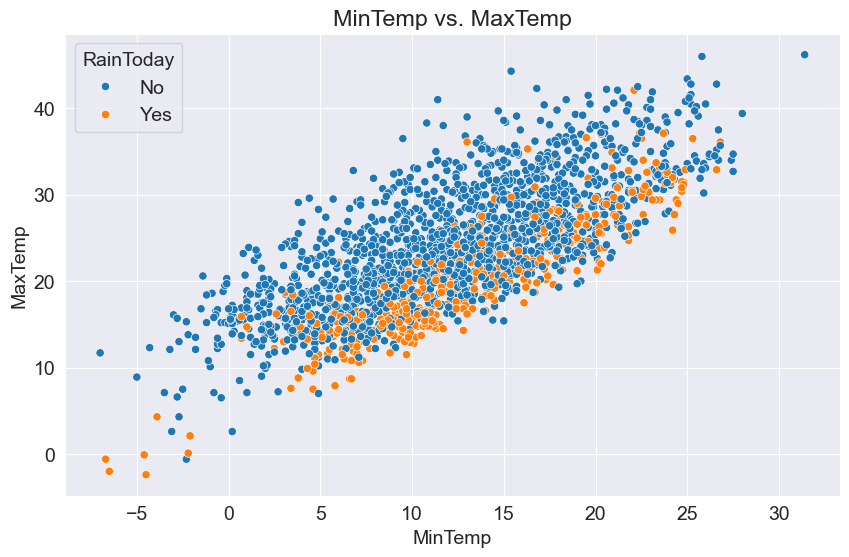

In [9]:
sns.scatterplot(data = raw_df.sample(2000),
                x = 'MinTemp',
                y = 'MaxTemp',
                hue = 'RainToday')
plt.title('MinTemp vs. MaxTemp')
plt.show()

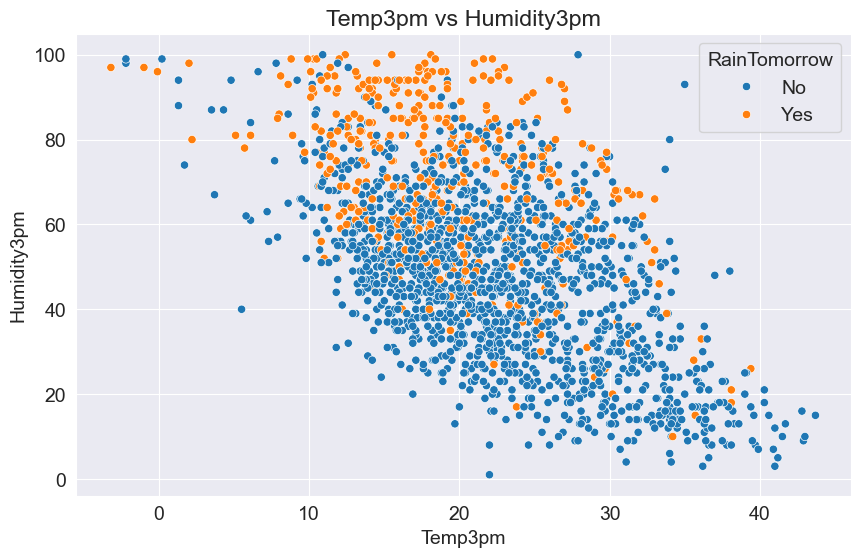

In [10]:
sns.scatterplot(data = raw_df.sample(2000),
                x = 'Temp3pm',
                y = 'Humidity3pm',
                hue = 'RainTomorrow')
plt.title('Temp3pm vs Humidity3pm')
plt.show()

Creating training, validation and test data sets
Year < 2015 is for training data set
Year = 2015 is for validaton data set
Year > 2015 is for test data set

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [12]:
print('Training dataset shape:', train_df.shape)
print('Validation dataset shape:', val_df.shape)
print('Test dataset shape:', test_df.shape)

Training dataset shape: (98988, 23)
Validation dataset shape: (17231, 23)
Test dataset shape: (25974, 23)


Identifying input and target columns

In [13]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [14]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [15]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [16]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Identify numerical and categorical columns

In [17]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [18]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [19]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Imputing missing values

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [21]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [22]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Scaling numeric features

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [24]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [25]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


Encoding categorical data

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [27]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [28]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [29]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Drop the textual categorical columns so that we are left with only numeric values

In [30]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [31]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,0.566038,0.523629,0.018329,0.037723,0.525852,0.193798,0.046154,0.103448,0.92,0.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Training and visaulizing decision trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(random_state=42)

In [34]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 3.5 s
Wall time: 3.48 s


DecisionTreeClassifier(random_state=42)

Evaluating the accuracy score

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [37]:
pd.value_counts(train_preds)

No     76707
Yes    22281
Name: count, dtype: int64

In [38]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [39]:
accuracy_score(train_targets,train_preds)

0.9999797955307714

In [40]:
model.score(X_val, val_targets)

0.7921188555510418

In [41]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

Visualization

In [42]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

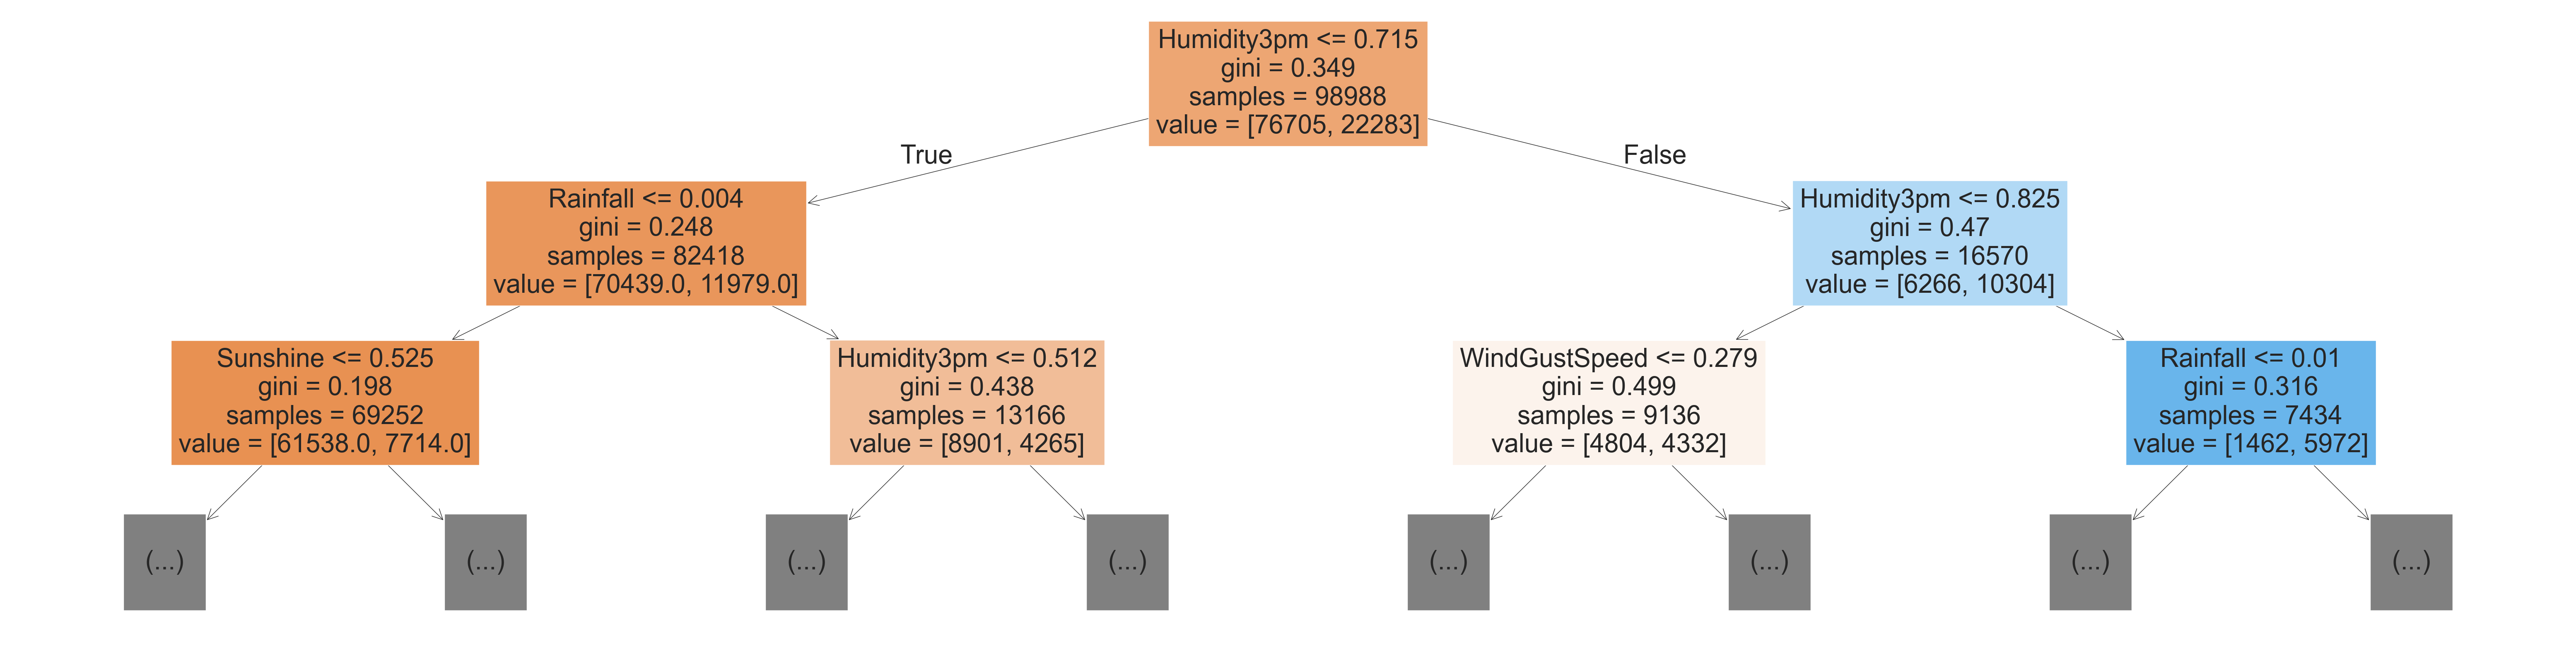

In [43]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

Display tree as text

In [44]:
model.tree_.max_depth

48

In [45]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

Feature importane to establish the importance of each input based on gini index

In [46]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [47]:
importance_df = pd.DataFrame(
  {
    'feature': X_train.columns,
    'importance': model.feature_importances_
  }
).sort_values('importance', ascending=False)

In [48]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


Feature importance visualization

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

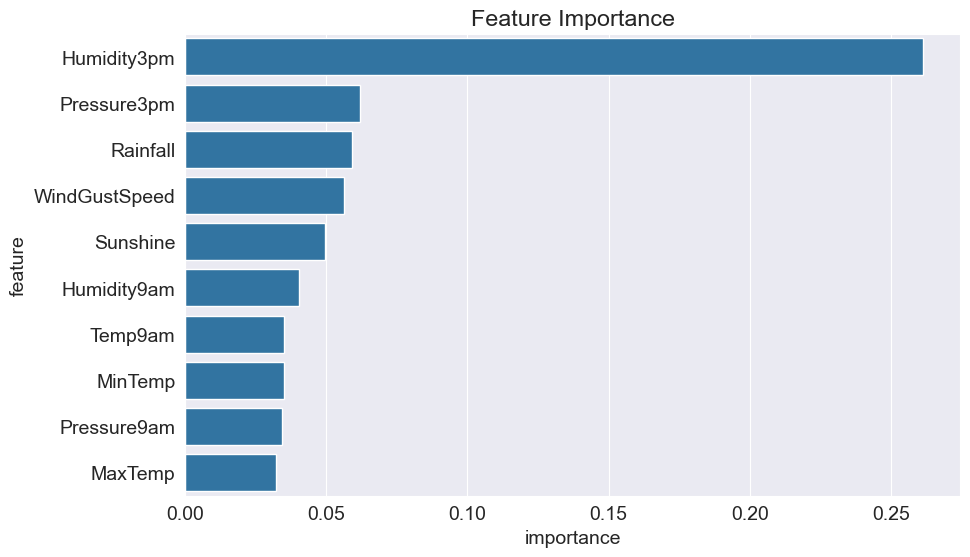

In [49]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

Hyperparameter Tuning and overfitting: Train dataset had 100% accuracy while validation dataset had 78%, this is called overfitting and below are strategies to reduce overfitting.
Hyperparamets: max_depth and max_leaf_nodes, must be configured manually

Reducing max_depth so that model does not memorize all training examples

In [50]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
model.score(X_train, train_targets)

0.8291308037337859

In [52]:
model.score(X_val, val_targets)

0.8334397307178921

In [53]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

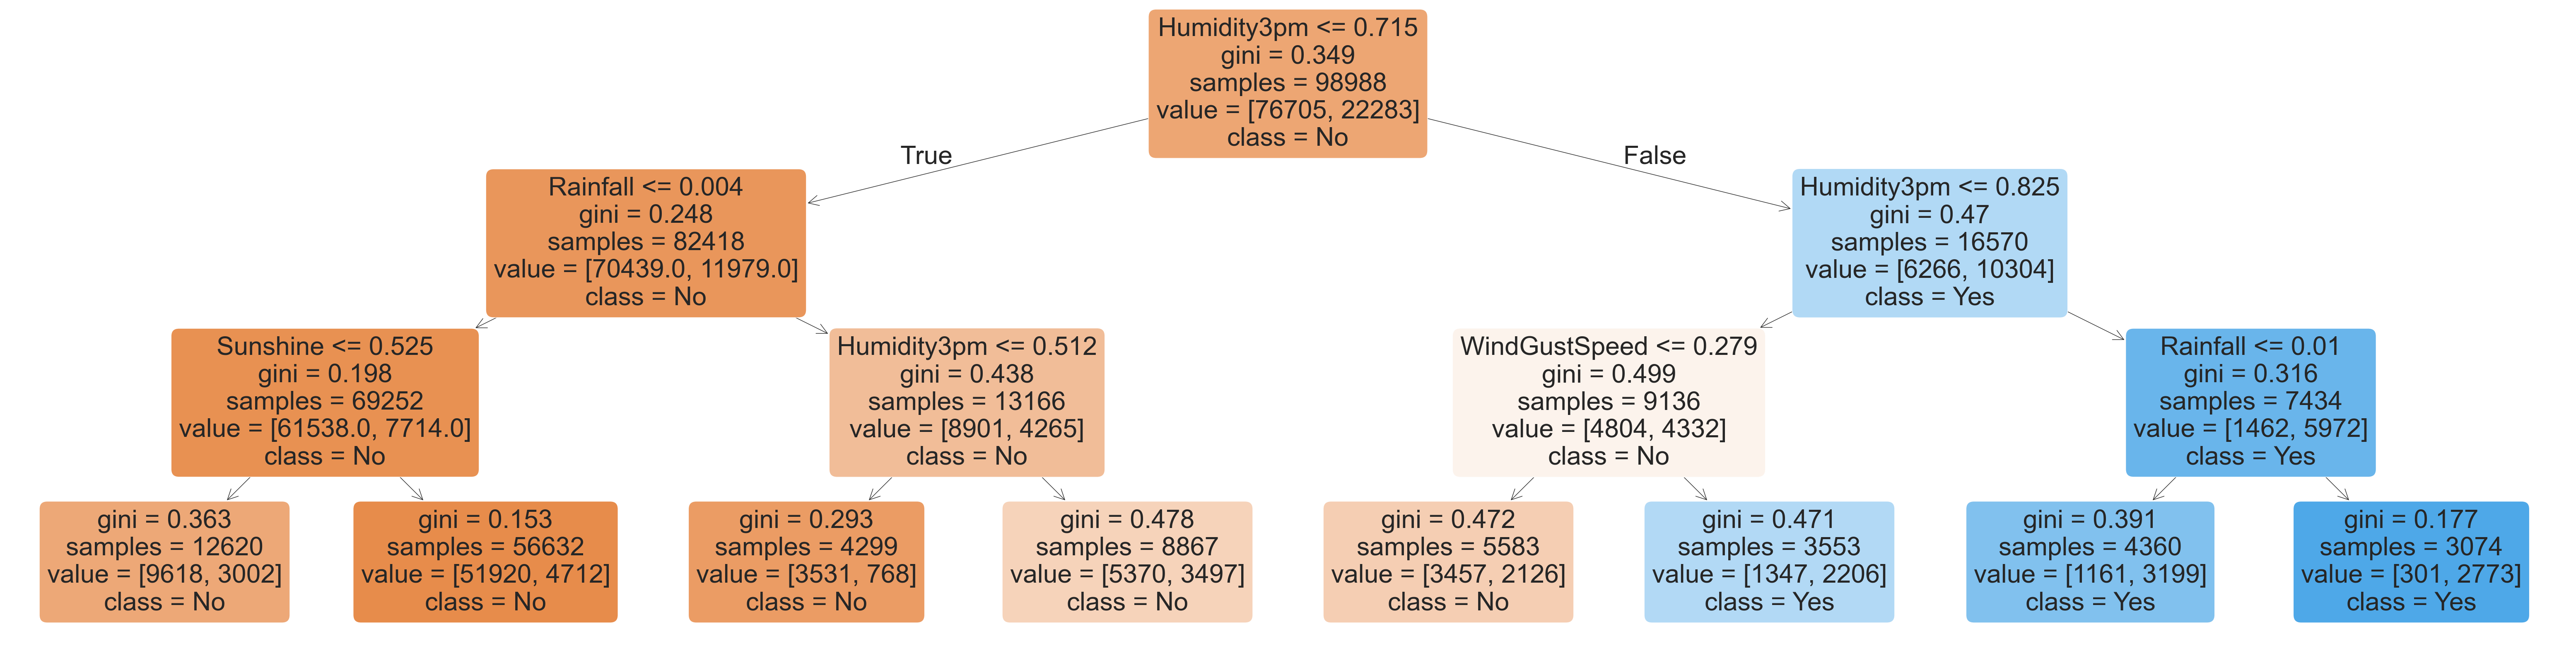

In [54]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [55]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Experimen with different depths

In [56]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_targets)
  train_acc = 1 - model.score(X_train, train_targets)
  val_acc = 1 - model.score(X_val, val_targets)
  return { 'Max depth': md, 'Training error': train_acc, 'Validation error': val_acc}

In [57]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
errors_df

,Max depth,Training error,Validation error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


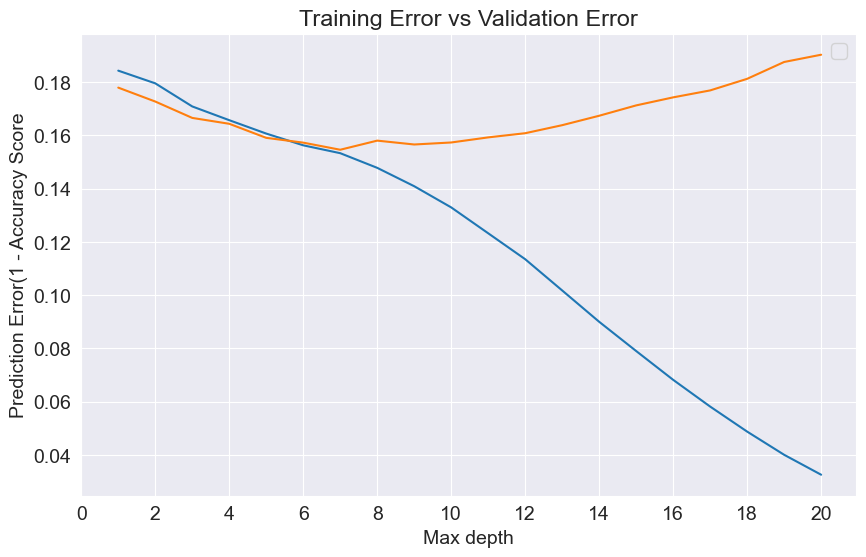

In [58]:
plt.figure()
plt.plot(errors_df['Max depth'], errors_df['Training error'])
plt.plot(errors_df['Max depth'], errors_df['Validation error'])
plt.title('Training Error vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max depth')
plt.ylabel('Prediction Error(1 - Accuracy Score')
plt.legend('Training','Validation')

Tune hyperparameters to find the optimal fit  

In [59]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

Limiting number of leaf nodes to control the complexity of decision tree

In [60]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.8480421869317493

In [61]:
model.score(X_val, val_targets)

0.8442342290058615

In [62]:
model.tree_.max_depth

12

In [63]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

Random Forest: Combine the results of multiple decison trees trained with slightly different parameters

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [66]:
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.9999494888269285

In [67]:
model.score(X_val, val_targets)

0.8566537055307295

Probabilities for predictions

In [68]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [69]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]\nclass = No'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]\nclass = Yes'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570.0, 2734.0]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514.0, 7796.0]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure9am <= 0.614

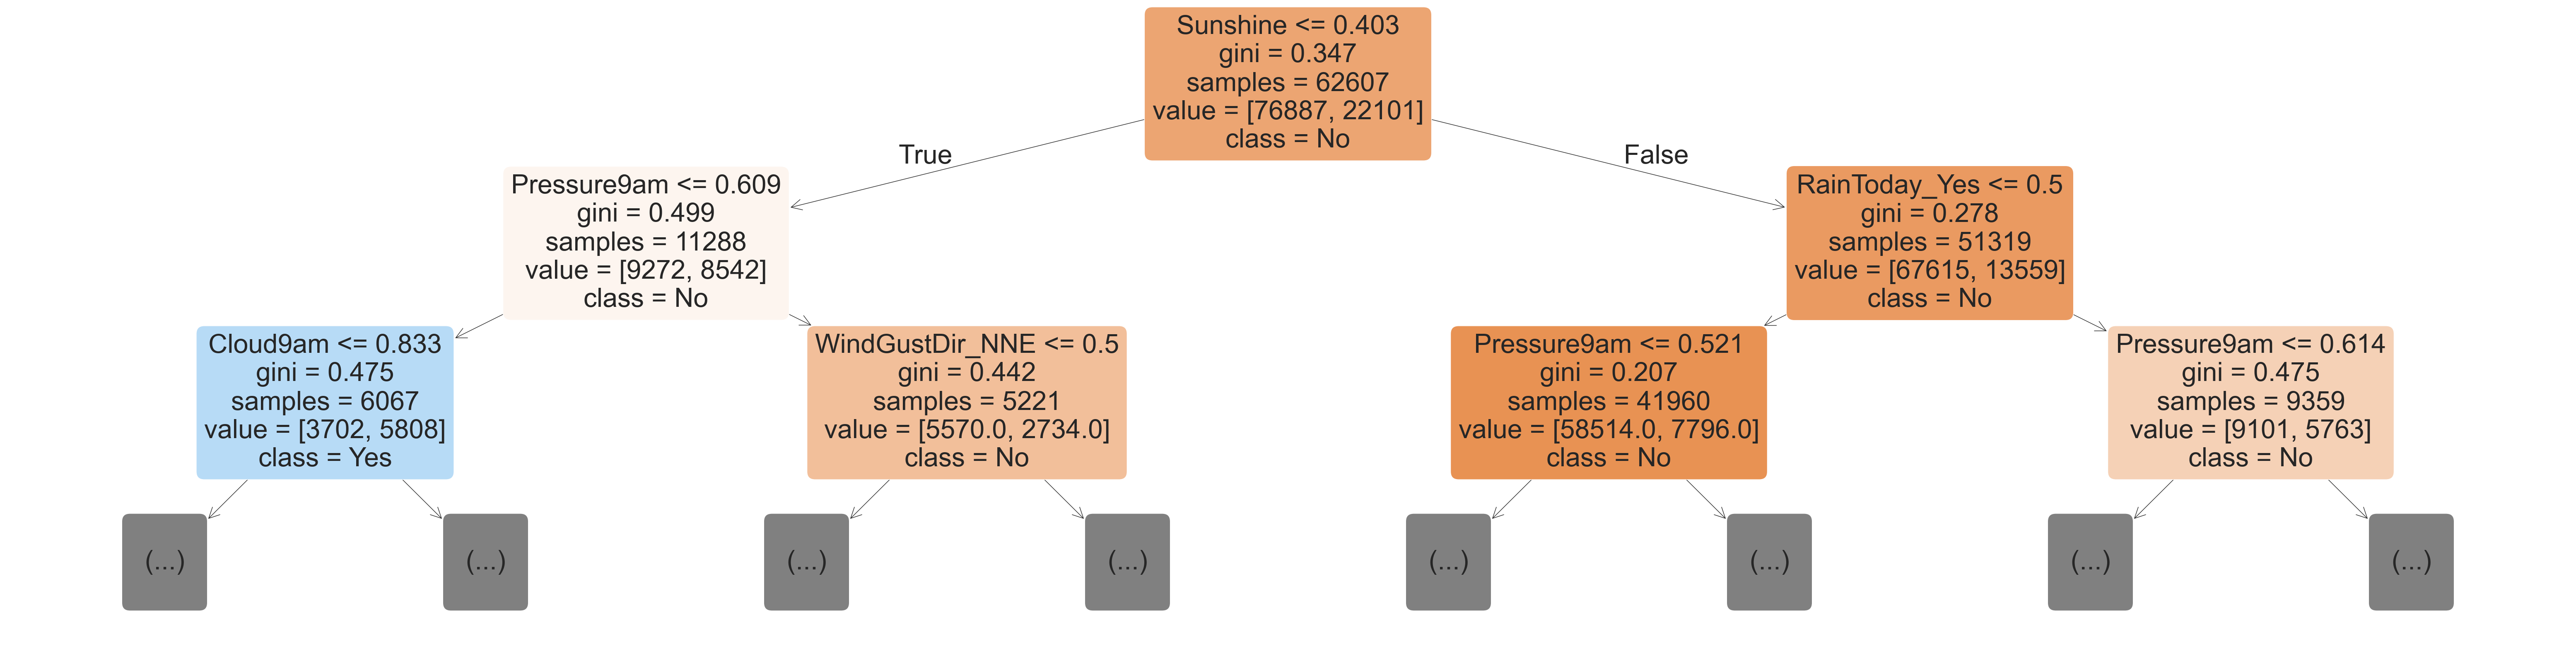

In [70]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth = 2, feature_names=X_train.columns, filled = True, rounded = True, class_names = model.classes_)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.349\nsamples = 62610\nvalue = [76714, 22274]\nclass = No'),
 Text(0.25, 0.625, 'WindGustDir_ESE <= 0.5\ngini = 0.262\nsamples = 48715\nvalue = [65024, 11930]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Pressure3pm <= 0.505\ngini = 0.267\nsamples = 46043\nvalue = [61211.0, 11515.0]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.665\ngini = 0.177\nsamples = 2672\nvalue = [3813, 415]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindSpeed3pm <= 0.333\ngini = 0.498\nsamples = 13895\nvalue = [11690, 10344]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Sunshine <= 0.534\ngini = 0.495\nsamples = 11567\nvalue = [10070, 8283]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Sunshine <= 0.424

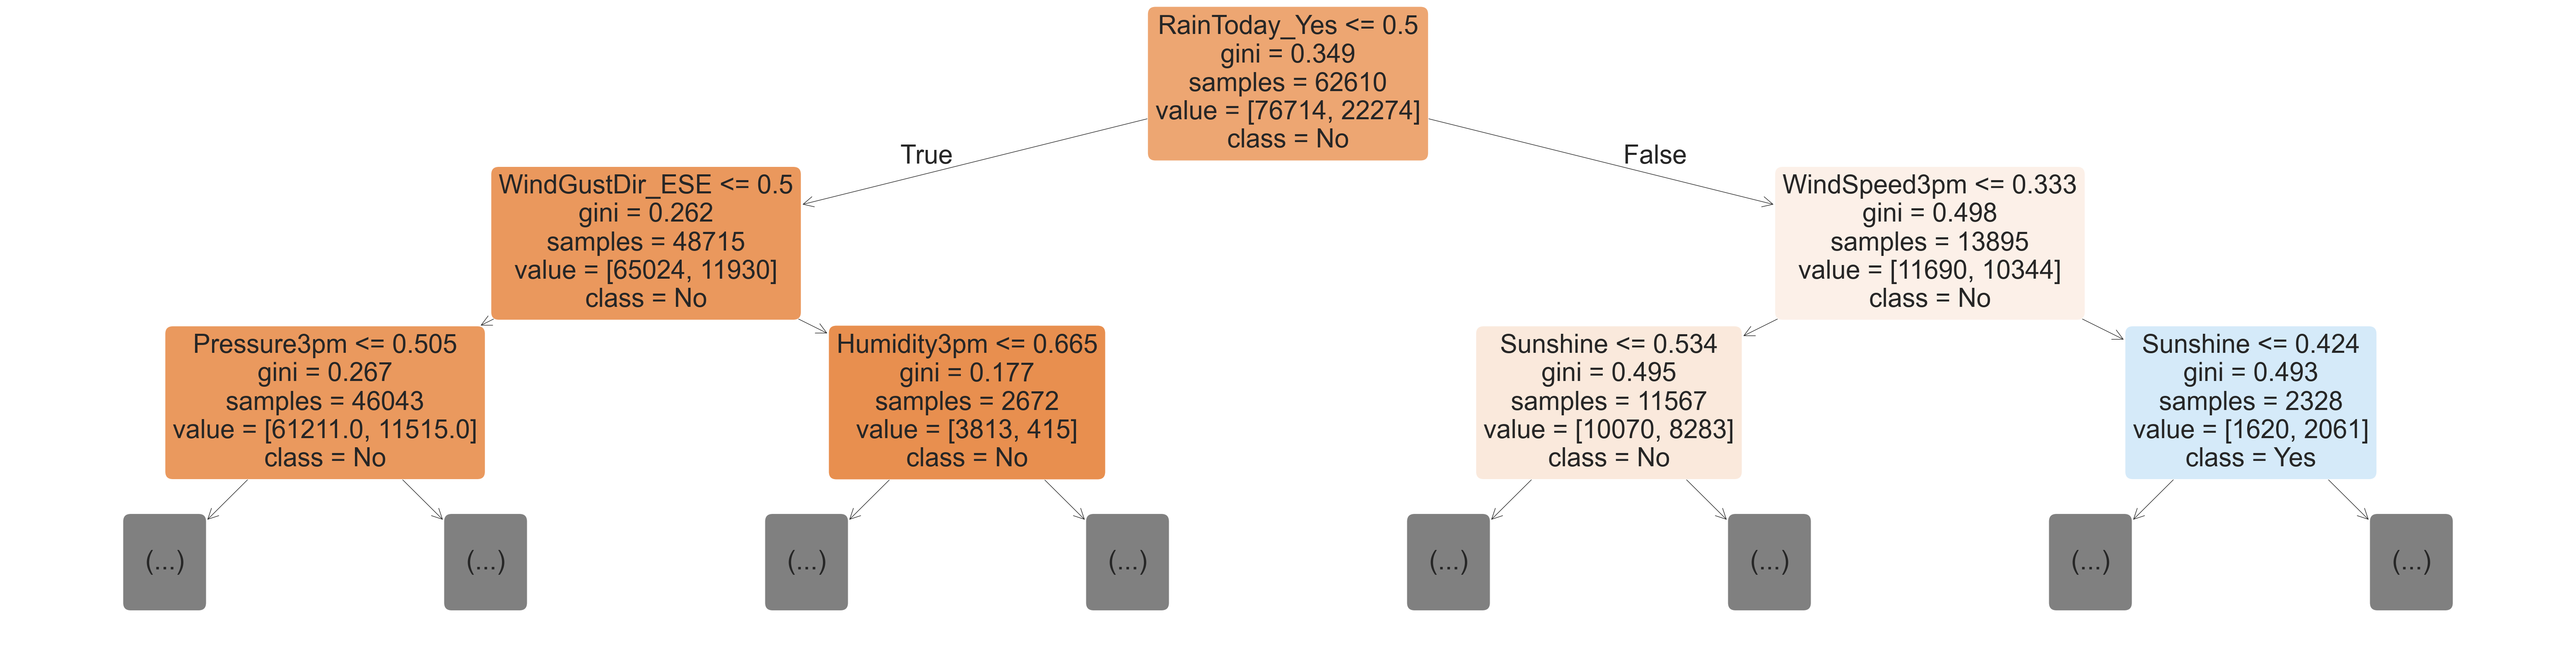

In [71]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth = 2, feature_names=X_train.columns, filled = True, rounded = True, class_names = model.classes_)

In [72]:
len(model.estimators_)

100

In [73]:
importance_df = pd.DataFrame(
  {
    'feature': X_train.columns,
    'importance': model.feature_importances_
  }
).sort_values('importance', ascending=False)

In [74]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

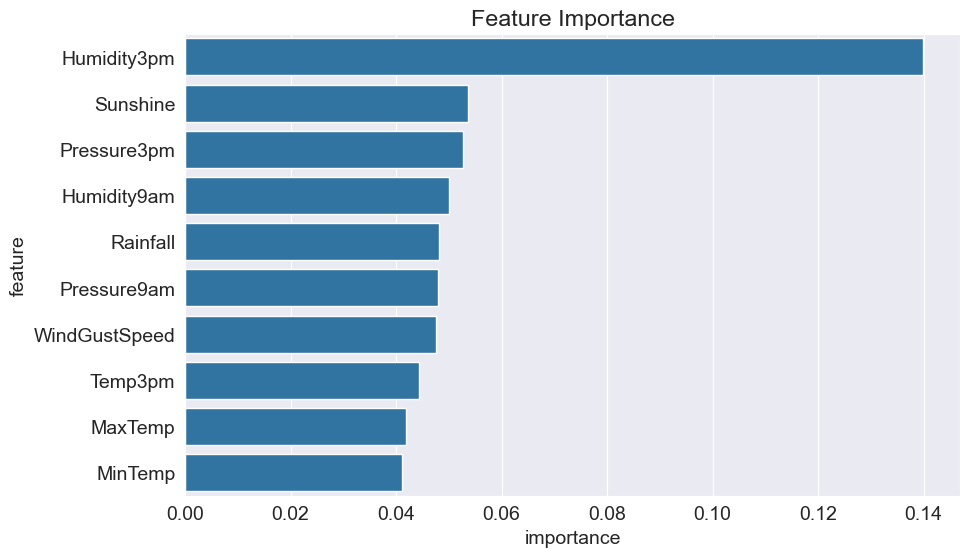

In [75]:
plt.title('Feature Importance')
sns.barplot(data= importance_df.head(10), x='importance', y= 'feature')

Hyperparameter tuning with random forests, we will create a base model with which we can compare the tuned hyperparameter models

In [76]:
base_model = RandomForestClassifier(random_state=42, n_jobs = -1).fit(X_train, train_targets)

In [77]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [78]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

n_estimators: This is used to set the number of decision trees in random forests, the default value is 100. In general, try to have as few estimators as possible. Below is for 10 estimators

In [79]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [80]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [81]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.986958015112943, 0.8485868492832686)

In [82]:
base_accs

(0.9999494888269285, 0.8566537055307295)

Below is for 500 estimators

In [83]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [84]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8577563693343393)

In [85]:
base_accs

(0.9999494888269285, 0.8566537055307295)

max_depth and max_leaf nodes
By default no maximum depth is specified, that is why each tree has training accuracy of 100%. We can specify a max_depth to reduce overfitting

In [86]:
def test_params(**params):
  model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
  return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [87]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [88]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [89]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [90]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8568278103418258)

In [91]:
base_accs

(0.9999494888269285, 0.8566537055307295)

max_features: insted of picking all features for every split, we can specify that only a fraction of features be chosen randomly to figure out a split

In [92]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [93]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [94]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [95]:
base_accs

(0.9999494888269285, 0.8566537055307295)

min_samples_split and min_samples_leaf: We can change these values to larger number to reduce overfitting, especially for very large datasets

In [96]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [97]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

In [98]:
base_accs

(0.9999494888269285, 0.8566537055307295)

min_impurity_decrease: This argument is used to control the threshold for splitting nodes. Default value is 0 which can be increased to reduce overfitting

In [99]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [100]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [101]:
base_accs

(0.9999494888269285, 0.8566537055307295)

bootstrap, max_samples: a random forest tree does not use entire dataset for training each decision tree. It applies a technique called bootstrapping, its default value is True. It helps the random forest generalize better.

In [102]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [103]:
base_accs

(0.9999494888269285, 0.8566537055307295)

When bootstrapping is True, we can also choose a fraction of rows from sample data.

In [104]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [105]:
base_accs

(0.9999494888269285, 0.8566537055307295)

class_weight

In [106]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [107]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [108]:
test_params(class_weight={
  'No':1,
  'Yes':2
})

(0.9999595910615429, 0.8558412164122802)

In [109]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [110]:
model = RandomForestClassifier( 
                                n_jobs=-1,
                                random_state=42,
                                n_estimators=500,
                                max_features=7,
                                max_depth=30,
                                class_weight={
                                  'No':1,
                                  'Yes':1.5
                                }
                              )

In [111]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [112]:
model.score(X_train, train_targets)

0.9920192346547057

In [113]:
base_accs

(0.9999494888269285, 0.8566537055307295)

Lets predict the accuracy of test Dataset

In [114]:
model.score(X_test, test_targets)

0.8451913451913452

Making predictions on new input

In [115]:
import numpy as np
def predict_input(model, single_input):
  inputs_df = pd.DataFrame([single_input])
  inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
  inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
  X_input = inputs_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
  return pred, prob

In [116]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [117]:
predict_input(model, new_input)

('Yes', 0.7608595348304202)

In [118]:
new_input2 = {'Date': '2021-06-19',
             'Location': 'Cobar',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 80.0,
             'Humidity3pm': 65.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 27.0,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [119]:
predict_input(model, new_input2)

('Yes', 0.686965350472338)